In [2]:
import cv2
import matplotlib.pyplot as plt

In [4]:
cat4 = cv2.imread('/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/train/CAT/4.jpg')

In [5]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

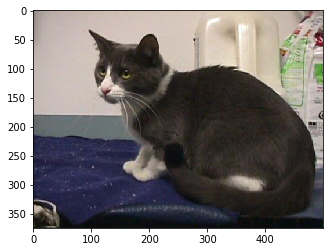

In [9]:
plt.imshow(cat4);

In [10]:
cat4.shape

(375, 500, 3)

In [11]:
dog = cv2.imread('/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/train/DOG/2.jpg')

In [12]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

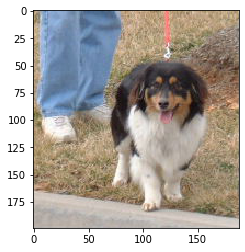

In [13]:
plt.imshow(dog);

In [14]:
dog.shape

(199, 188, 3)

**We see that all the images have different sizes which will create difficulty. So we are going to prepare the model.**

### What if there is a rotated image of a dog...that also has to be identified so...that can all be done by the ImageDataGenerator

In [16]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
image_gen = ImageDataGenerator(rotation_range = 30,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              rescale = 1/255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

# While doing zooming or flips or any of the other parameters, there will be 
# missing of few pixels...that can be filled by fill_mode.

In [26]:
# We can run this code again and again to get different random outputs.
new_dog = image_gen.random_transform(dog)

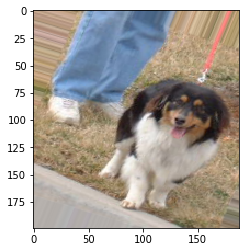

In [27]:
plt.imshow(new_dog);

### So here we get random twist of the original image..


**Now this same operation has to be done with all other images.**

In [28]:
image_gen.flow_from_directory('/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


# CREATING THE MODEL

In [34]:
 input_shape = (150,150,3)

In [32]:
from keras.models import Sequential

In [36]:
from keras.layers import Activation, Dropout,Dense, Flatten,Conv2D,MaxPooling2D

### Down here we will have to read and experiment the model by trying different number of filters in different layers and taking differet sizes of kernels.

In [38]:
# Creating the model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3),
                 input_shape = (150,150,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# DROPOUT LAYER
# Helps to reduce overfitting by randomly turning neurons off during the training.
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)             

In [40]:
# TRAINING THE MODEL

In [41]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/train',target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [42]:
batch_size = 16

test_image_gen = image_gen.flow_from_directory('/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/test',target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [44]:
# Tells what index belongs to which class.
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [45]:
# FITTING THE MODEL.

### In the documentation of this topic, we have this model fitted with 100 epochs which can be seen.

In [46]:
# Here as epoch is only 1, so we wont get much good results.
# It can be improved by increasing the no. of epochs but it will take
# a lot of time in training. 
results = model.fit_generator(train_image_gen, epochs = 1,
                              steps_per_epoch = 150,
                             validation_data = test_image_gen,
                             validation_steps= 12)

Epoch 1/1
150/150 [==============================] - 86s 573ms/step - loss: 0.6964 - accuracy: 0.4975 - val_loss: 0.6929 - val_accuracy: 0.4844


In [48]:
results.history['accuracy']

[0.4975]

### Now, we will load a already trained model which is there in the documentation of this topic.

In [49]:
# LOADING THE MODEL
from keras.models import load_model

In [51]:
new_model = load_model('/home/soniya/Documents/work/Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

## Predicting

In [58]:
dog_file = '/home/soniya/Documents/work/Computer-Vision-with-Python/CATS_DOGS/test/DOG/11077.jpg'

In [59]:
from keras.preprocessing import image

In [60]:
dog_img = image.load_img(dog_file, target_size = (150,150))

In [61]:
dog_img = image.img_to_array(dog_img)

In [62]:
dog_img.shape

(150, 150, 3)

**Now here we will have to add 1 more dimension to the image so that the network can understand.**

In [63]:
import numpy as np

In [64]:
dog_img = np.expand_dims(dog_img, axis = 0)

In [65]:
dog_img.shape

(1, 150, 150, 3)

So, the 4th dimension is added. 

In [66]:
dog_img = dog_img/255

In [67]:
model.predict_classes(dog_img)

array([[0]], dtype=int32)

# As it gives output 0 which is defined for a dog. 

In [68]:
# This gives how much sure the model is about the result it gave.
model.predict(dog_img)

array([[0.4990214]], dtype=float32)

### Here the model is 49.9 % sure about the output given.